10.2a)

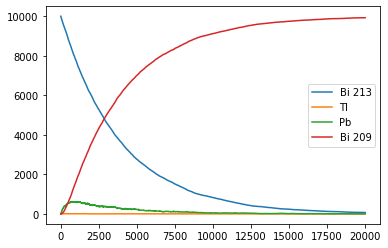

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
def cal_decay_prob(t):
  return math.log(2)/t
def update_1(n_bi_213,n_tl,n_pb,n_bi_209):
  n_bi_213_=n_bi_213
  n_tl_=n_tl
  n_pb_=n_pb
  n_bi_209_=n_bi_209
  pb_decay=cal_decay_prob(3.3*60)
  tl_decay=cal_decay_prob(2.2*60)
  bi_decay=cal_decay_prob(46*60)
  for i in range(n_pb):
    k=random.random()
    if k<pb_decay:
      n_pb_-=1
      n_bi_209_+=1
  for i in range(n_tl):
    k=random.random()
    if k<tl_decay:
      n_tl_-=1
      n_pb_+=1
  for i in range(n_bi_213):
    k=random.random()
    if k<bi_decay:
      n_bi_213_-=1
      q=random.random()
      if q<0.9791:
        n_pb_+=1
      else:
        n_tl_+=1
  return n_bi_213_, n_tl_, n_pb_, n_bi_209_
n_bi_213,n_tl,n_pb,n_bi_209=10000,0,0,0
bi_213=[10000]
tl=[0]
pb=[0]
bi_209=[0]
t_1=np.arange(1,20000,1)
for i in t_1:
  n_bi_213,n_tl,n_pb,n_bi_209=update_1(n_bi_213,n_tl,n_pb,n_bi_209)
  bi_213.append(n_bi_213)
  tl.append(n_tl)
  pb.append(n_pb)
  bi_209.append(n_bi_209)
t_1=np.concatenate(([0],t_1))
plt.plot(t_1,bi_213)
plt.plot(t_1,tl)
plt.plot(t_1,pb)
plt.plot(t_1,bi_209)
plt.legend(['Bi 213','Tl','Pb','Bi 209'])

10.7

In [ ]:
N=1000000
p=0
for i in range(N):
  x_2=np.random.rand(10)
  if np.dot(x_2,x_2)<1:
    p+=1
print('volume: '+str(p/N*(2**10)))

volume: 2.569216


10.10a)

minimum: -0.9999999999920409


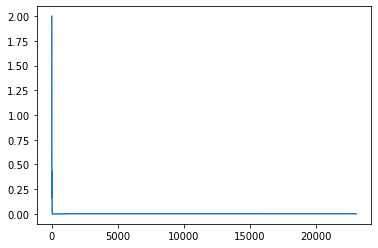

In [ ]:
def f_3_a(x):
  return x*x-math.cos(4*math.pi*x)
def SA(func,x_begin,kmax=10000):
  x_p=[]
  x=x_begin
  e=func(x)
  k=0
  T_max=10
  tau=10000
  T=T_max
  x_plot=[]
  while T>1:
    x_p.append(x)
    xn=x+np.random.normal(0,1)
    en=func(xn)
    #print('T:'+str(T))
    #print('en-e:'+str(en-e))
    if en<e or np.random.random()>math.exp((en-e)/T):
      e=en
      x=xn
    k+=1
    T=T_max*math.exp(-k/tau)
    x_plot.append(k)
  return x_p,e,x_plot
x_3,e,x_plot=SA(f_3_a,2)
plt.plot(x_plot,x_3)
print('minimum: '+str(e))

10.10b)

minimun: -2.612588382613347


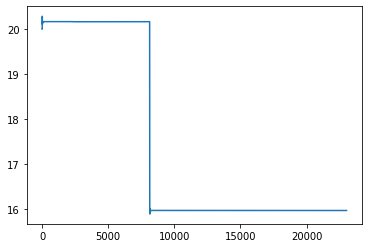

In [ ]:
def f_3_b(x):
  return math.cos(x)+math.cos(math.sqrt(2)*x)+math.cos(math.sqrt(3)*x)
x_3,e,x_plot=SA(f_3_b,20)
plt.plot(x_plot,x_3)
print('minimun: '+str(e))

10.11a)

In [ ]:
import matplotlib.animation as animation 
from IPython.display import clear_output
from IPython.display import HTML
import time
L=50
grid=np.zeros((L,L))
def update(x1,y1,x2,y2,T):
  if grid[x1][y1]==0 and grid[x2][y2]==0:
    grid[x1][y1]=1
    grid[x2][y2]=1
  elif grid[x1][y1]==grid[x2][y2] and np.random.random()<math.exp(-1/T):
    grid[x1][y1]=0
    grid[x2][y2]=0
fig=plt.figure()
axis=plt.axes(xlim=(0,L),ylim=(0,L))
line, = axis.plot([], [], 'ro') 
def init():
  line.set_data([],[])
  return line,
T_max=10
T=T_max
k=0
tau=10000
"""
im=plt.imshow(grid,animated='True')

def animate(k):
  T=T_max*math.exp(-k/tau)
  x1,y1=np.random.randint(L),np.random.randint(L)
  x2,y2=-10,-10
  while x2<0 or y2<0 or x2>=L or y2>=L:
    temp=np.random.randint(4)
    x2,y2=x1,y1
    if temp==0:
      x2+=1
    elif temp==1:
      x2-=1
    elif temp==2:
      y2+=1
    else:
      y2-=1
  update(x1,y1,x2,y2,T)

  alx=[]
  aly=[]
  for i in range(L):
    for j in range(L):
      if grid[i][j]==1:
        alx.append(j)
        aly.append(i)

  line.set_data(alx,aly)
  #plt.plot(alx,aly,'ro')
  return line,

  #im=plt.imshow(grid,interpolation='None')
  im.set_array(grid)
  return im,

anim=animation.FuncAnimation(fig,animate,init_func=init,frames=100,interval=20,blit=True)
HTML(anim.to_html5_video())
"""
while T>1:
  x1,y1=np.random.randint(L),np.random.randint(L)
  x2,y2=-10,-10
  while x2<0 or y2<0 or x2>=L or y2>=L:
    temp=np.random.randint(4)
    x2,y2=x1,y1
    if temp==0:
      x2+=1
    elif temp==1:
      x2-=1
    elif temp==2:
      y2+=1
    else:
      y2-=1
  update(x1,y1,x2,y2,T)
  k+=1
  T=T_max*math.exp(-k/tau)
  alx=[]
  aly=[]
  for i in range(L):
    for j in range(L):
      if grid[i][j]==1:
        alx.append(j)
        aly.append(i)
  clear_output(wait='True')
  plt.plot(alx,aly,'ro')
  plt.show()
  time.sleep(0.05)


KeyboardInterrupt: ignored

10.12a)<br>
$\theta$ is in range $[0,\pi]$ while $\phi$ is in range $[0,2\pi)$<br>
$\int_0^{\pi}\frac{sin\theta}{2}d\theta\int_0^{2\pi}\frac{d\phi}{2\pi}=1 $

10.12b)<br>
CDF of $\theta$: <br>
$\int_0^{\theta}\frac{sinx}{2}dx$<br>
$=\frac{1}{2}(1-cos\theta)$<br>
Inverse of CDF:<br>
$f(x)=arccos(1-2x)$<br>
First generate a random number $x$ in $[0,1)$, then calculate $f(x)$

10.12c)

In [ ]:
def p_theta():
  x=np.random.uniform(0,1)
  return math.acos(1-2*x)
def p_phi():
  return np.random.uniform(0,2*math.pi)

10.13c)

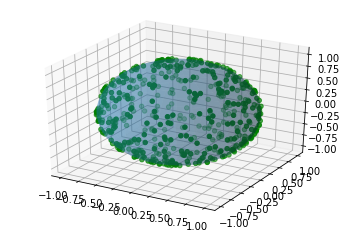

In [ ]:
theta=[]
phi=[]
for i in range(500):
  theta.append(p_theta())
  phi.append(p_phi())
#print(theta)
x_5=[]
y_5=[]
z_5=[]
for i in range(500):
  x_5.append(math.sin(theta[i])*math.cos(phi[i]))
  y_5.append(math.sin(theta[i])*math.sin(phi[i]))
  z_5.append(math.cos(theta[i]))
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
r=1
u_,v_=np.mgrid[0:2*math.pi:30j, 0:np.pi:20j]
x_=np.cos(u_) * np.sin(v_)
y_=np.sin(u_) * np.sin(v_)
z_=np.cos(v_)
ax.plot_surface(x_,y_,z_,alpha=0.3)
ax.scatter3D(x_5,y_5,z_5,color='green')

8.1a)

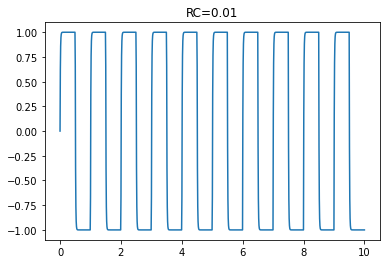

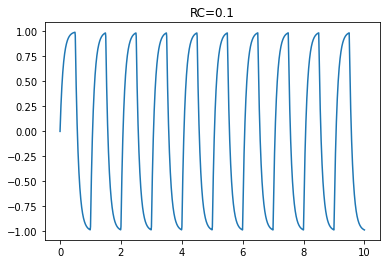

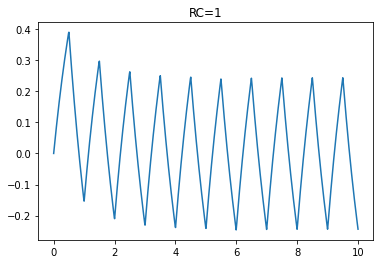

In [ ]:
def RK4(func,h,t,y_begin):
  k1=func(t,y_begin)
  k2=func(t+h/2,h/2*k1+y_begin)
  k3=func(t+h/2,y_begin+h/2*k2)
  k4=func(t+h,y_begin+h*k3)
  return y_begin+h/6*(k1+2*k2+2*k3+k4)
def V_in(t):
  if math.floor(2*t)%2==0:
    return 1
  return -1
RC=0.01
def f_6(t,v_out):
  return 1/RC*(V_in(t)-v_out)
t_6=np.linspace(0,10,1000)
y_6=[0]
for i in range(len(t_6)-1):
  y_6.append(RK4(f_6,0.01,t_6[i],y_6[-1]))
plt.plot(t_6,y_6)
plt.title('RC=0.01')
plt.show()
RC=0.1
y_6=[0]
for i in range(len(t_6)-1):
  y_6.append(RK4(f_6,0.01,t_6[i],y_6[-1]))
plt.plot(t_6,y_6)
plt.title('RC=0.1')
plt.show()
RC=1
y_6=[0]
for i in range(len(t_6)-1):
  y_6.append(RK4(f_6,0.01,t_6[i],y_6[-1]))
plt.plot(t_6,y_6)
plt.title('RC=1')
plt.show()

8.1b)There is a periodic wave pattern for the output voltage